## 1. Setup

In [1]:
import sys
sys.path.append('../..')

In [2]:
import matplotlib.pyplot as plt
import os

from utils.input_output import read_json

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
DATASET_NAMES = ['icoseg/subset_80',
                 'inria_aerial/subset_chicago']

UNET_NAMES = ['UNet_SAL_MAP_NONE',
              'UNet_SAL_MAP_DECONV',
              'UNet_SAL_MAP_GUIDED',
              'UNet_RGB',
              'UNet_RGB_SAL_MAP_NONE',
              'UNet_RGB_SAL_MAP_DECONV',
              'UNet_RGB_SAL_MAP_GUIDED']

## 2. Plots

__Training details__
* __Loss:__ binary cross entropy;
* __Optimizer:__ Adam(lr=1e-4);
* __Metrics:__ IoU and Dice;
* __Prediction_threshold:__ 0.5;
* __Num_epochs:__ 20;
* __Batch_size:__ 1;
* __UNet_input_shape:__ (512, 512, ch), ch = {1, 3, 4}.

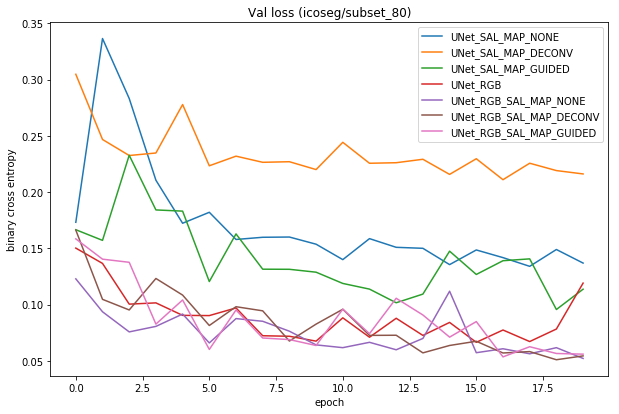

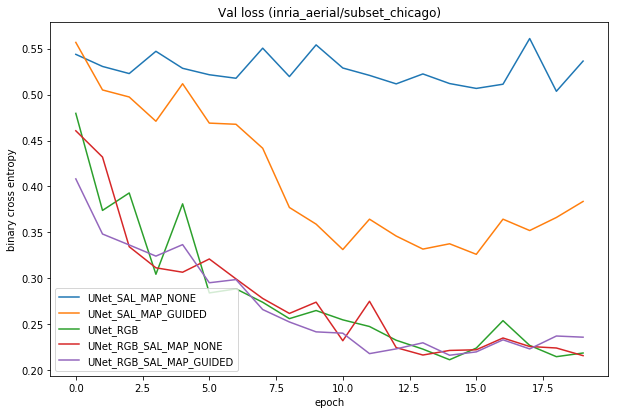

In [5]:
for dataset_name in DATASET_NAMES:
    plt.figure(figsize=(10, 6.5))
    plt.title(f'Val loss ({dataset_name})')
    plt.ylabel('binary cross entropy')
    plt.xlabel('epoch')
    for unet_name in UNET_NAMES:
        experiment_name = f'{dataset_name}/{unet_name}'
        logs_filename = f'../../logs/{experiment_name}.json'
        
        if os.path.isfile(logs_filename):
            logs = read_json(logs_filename)
            plt.plot(logs['val_loss'], label=f'{unet_name}')
            plt.legend()
    
    save_path = './val_loss_' + "_".join(dataset_name.split("/")) + '.png'
    plt.savefig(save_path)      

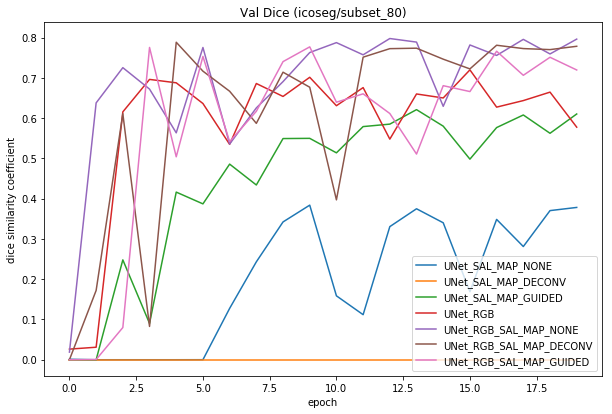

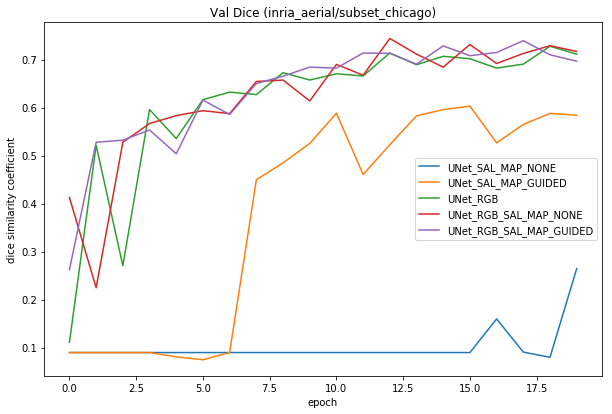

In [6]:
for dataset_name in DATASET_NAMES:
    plt.figure(figsize=(10, 6.5))
    plt.title(f'Val Dice ({dataset_name})')
    plt.ylabel('dice similarity coefficient')
    plt.xlabel('epoch')
    for unet_name in UNET_NAMES:
        experiment_name = f'{dataset_name}/{unet_name}'
        logs_filename = f'../../logs/{experiment_name}.json'
        
        if os.path.isfile(logs_filename):
            logs = read_json(logs_filename)
            plt.plot(logs['val_tf_dice'], label=f'{unet_name}')
            plt.legend()
            
    save_path = './val_dice_' + "_".join(dataset_name.split("/")) + '.png'
    plt.savefig(save_path)  

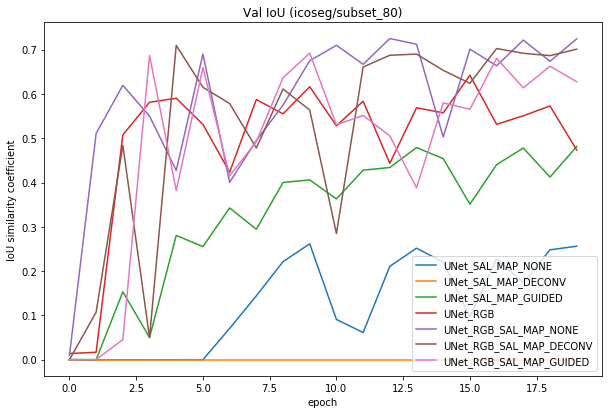

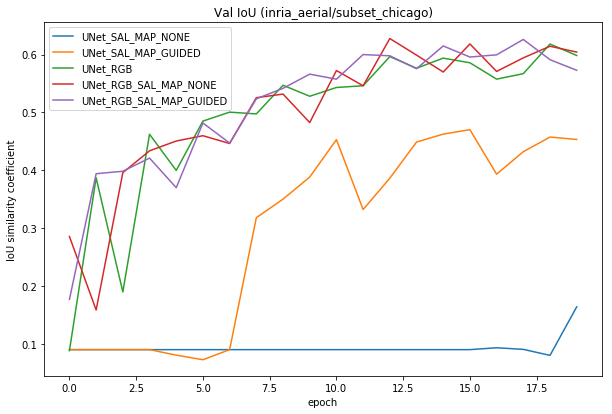

In [7]:
for dataset_name in DATASET_NAMES:
    plt.figure(figsize=(10, 6.5))
    plt.title(f'Val IoU ({dataset_name})')
    plt.ylabel('IoU similarity coefficient')
    plt.xlabel('epoch')
    for unet_name in UNET_NAMES:
        experiment_name = f'{dataset_name}/{unet_name}'
        logs_filename = f'../../logs/{experiment_name}.json'
        
        if os.path.isfile(logs_filename):
            logs = read_json(logs_filename)
            plt.plot(logs['val_tf_jaccard'], label=f'{unet_name}')
            plt.legend()
            
    save_path = './val_iou_' + "_".join(dataset_name.split("/")) + '.png'
    plt.savefig(save_path) 